In [1]:
#
# This will be used to visualize the data taken by the Vemco Rx-Live Receiver 
# Data taken using Putty
#

In [1]:
# libraries
import numpy as np
import pandas as pd
import os
import os.path
import shutil
import csv
import math
import statistics

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [52]:
df_list = []
allFiles = list(os.walk("./Long_Beach_6_29_2021"))  # Change name to specfic directory

for item in allFiles:
        foldername, LoDirs, LoFiles = item
#         print('Foldername: ' + foldername)
#         print(f'LoDirs: {LoDirs}')
#         print(f'LoFiles: {LoFiles}')

        count = 0
        for filename in LoFiles:
            if filename == "data_1.csv" or filename == 'data_2.csv' or filename == 'data_3.csv':
                path = os.getcwd() + "/Long_Beach_6_29_2021/" + filename 
                df = pd.read_csv(path, engine='python', header=0, index_col=False)
                df_list.append(df)

In [53]:
final_df = pd.concat(df_list)

In [54]:
pd.set_option('display.max_rows', 10)  # None for no limit; default: 10
pd.set_option('display.min_rows', 10)  # None for no limit; default: 10

# Let's view it
final_df

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


In [55]:
#
# this df.info() call will show the different features (columns), their types, and how many non-null there are
#

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Receiver Serial Number    220 non-null    int64  
 1   Three-Digit Line-Counter  220 non-null    int64  
 2   Date/Time                 220 non-null    object 
 3   Transmitter Code-Space    220 non-null    object 
 4   Transmitter ID Number     220 non-null    int64  
 5   Signal Level (dB)         220 non-null    float64
 6   Noise-Level (dB)          220 non-null    float64
 7   Zero                      220 non-null    int64  
 8   Channel                   220 non-null    object 
 9   Distance (m)              220 non-null    int64  
 10  Sensor GPS Coords         220 non-null    object 
 11  Tag GPS Coords            220 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.3+ KB


In [56]:
#final_df.columns = ["Receiver Serial Number", "Three-Digit Line-Counter", "Date/Time", "Transmitter Code-Space", "Transmitter ID Number", "Signal Level (dB)", "Noise-Level (dB)", "Channel", "Zero", "Distance (m)", "Sensor GPS Coords", "Tag GPS Coords"] 

In [57]:
df_clean = final_df.dropna()

In [58]:
df_clean

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


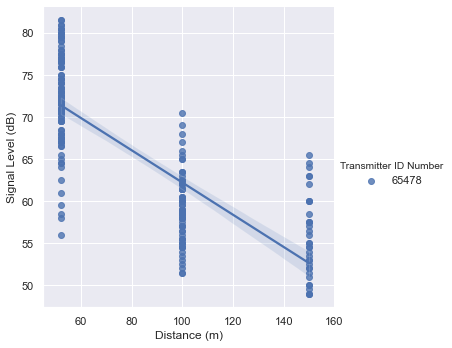

In [59]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Signal Level (dB)', fit_reg=True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(45, 160)
plt.savefig("long_beach_signal_plot.png")

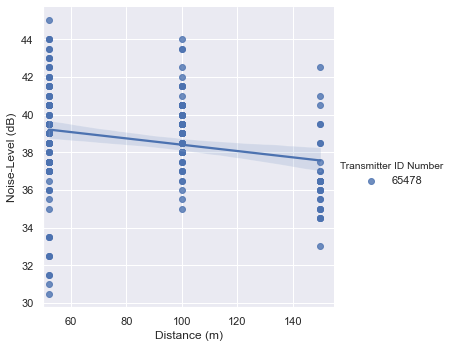

In [60]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Noise-Level (dB)', fit_reg = True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(50, 155)
plt.savefig('long_beach_noise_plot.png')

In [61]:
##### To edit csvs and plot new histogram #####

There were 7 outliers at 50m.


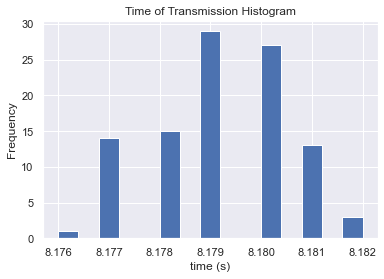

In [24]:
# path = os.getcwd() + "/Long_Beach_6_29_2021/data_1_calculated_error_values.csv"

# with open(path, "r") as f:
#     reader = csv.reader(f)
#     spamreader = csv.reader(f)
#     for row in spamreader:
#         print(row)
            
# df_to_change = pd.read_csv(path, engine='python', header=None, index_col=False)

# temp = df_to_change
# delta_t = []




# print(temp.values)
# for i in range(2, len(temp.values[0][0])):
#     print(temp.values[0][0][i])
#     if temp.values[0][0][i] < 12:
#        delta_t.append(temp.values[0][0][i])      

# delta_t

total_data = []

### EVERYTHING ABOVE IS GARBAGE UNTILL CSV IS FIXED

data1 = [8.179, 8.177, 8.179, 8.181, 8.18, 8.177, 8.179, 8.179, 8.179, 8.177, 8.178, 8.179, 8.182, 8.181, 8.181, 16.36, 8.179, 16.355, 8.179, 8.178, 8.179, 8.177, 8.179, 8.18, 8.18, 8.18, 8.18, 8.18, 8.181, 8.18, 8.18, 8.179, 16.359, 8.178, 8.178, 8.178, 8.178, 8.177, 8.178, 8.18, 8.181, 8.18, 8.179, 8.18, 8.18, 8.179, 8.179, 8.18, 8.179, 8.181, 8.179, 8.18, 8.179, 8.179, 8.18, 8.178, 16.356, 8.177, 8.177, 8.182, 8.18, 8.18, 8.181, 8.181, 16.359, 8.18, 8.179, 8.179, 8.177, 8.176, 8.177, 8.177, 8.178, 8.178, 8.18, 8.181, 8.18, 8.18, 8.18, 8.178, 16.356, 8.18, 8.18, 8.182, 8.18, 8.179, 8.178, 8.177, 8.179, 8.179, 16.363, 8.179, 8.179, 8.178, 8.177, 8.177, 8.177, 8.178, 8.179, 8.18, 8.181, 8.179, 8.181, 8.181, 8.18, 8.178, 8.181, 8.179, 8.179]
new_data1 = []
count = 0

for num in data1:
    if num < 10:
        new_data1.append(num)
    else:
        count += 1

total_data += new_data1 
print(f"There were {count} outliers at 50m.")
delta_t_np1 = np.array(new_data1)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np1, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_1_no_outliers" + "_histogram.png")
plt.show()


There were 20 outliers at 100m.


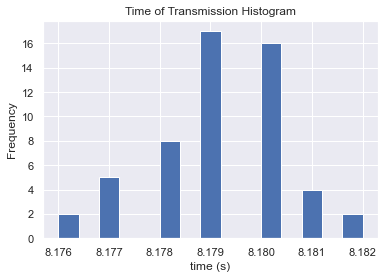

In [25]:
data2 = [8.18, 16.363, 24.541, 8.181, 8.179, 8.18, 8.179, 8.179, 8.18, 8.179, 8.18, 8.182, 8.176, 8.179, 8.18, 8.178, 8.179, 8.18, 8.18, 8.18, 8.177, 8.177, 32.715, 16.358, 8.177, 8.179, 8.179, 16.356, 32.713, 16.361, 32.72, 8.182, 32.722, 8.178, 8.18, 8.178, 8.178, 8.178, 8.176, 8.178, 8.177, 8.178, 8.178, 8.179, 16.359, 8.181, 8.177, 8.179, 8.18, 32.719, 8.181, 8.18, 24.539, 8.18, 16.356, 24.529, 32.72, 8.179, 8.18, 16.361, 8.179, 8.179, 16.36, 8.18, 8.179, 8.179, 8.181, 16.359, 16.36, 16.36, 8.179, 8.18, 8.18, 8.179]
new_data2 = []
count = 0

for num in data2:
    if num < 10:
        new_data2.append(num)
    else:
        count += 1

total_data += new_data2 
print(f"There were {count} outliers at 100m.")

delta_t_np2 = np.array(new_data2)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np2, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_2_no_outliers" + "_histogram.png")
plt.show()

There were 19 outliers at 150m.


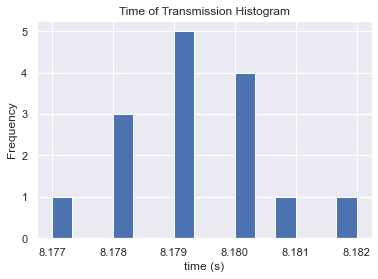

In [26]:
data3 = [8.177, 8.178, 8.18, 8.178, 8.178, 16.355, 8.179, 8.18, 73.618, 16.361, 49.078, 8.179, 8.179, 89.968, 16.36, 8.179, 8.18, 16.36, 49.074, 40.882, 40.903, 8.18, 49.082, 8.181, 40.891, 16.354, 16.356, 8.179, 24.535, 24.537, 24.538, 8.182, 16.36, 32.72]
new_data3 = []

count = 0

for num in data3:
    if num < 10:
        new_data3.append(num)
    else:
        count += 1
        
total_data += new_data3 
print(f"There were {count} outliers at 150m.")
        
delta_t_np3 = np.array(new_data3)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np3, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_3_no_outliers" + "_histogram.png")
plt.show()

The total avg is 8.179152046783626


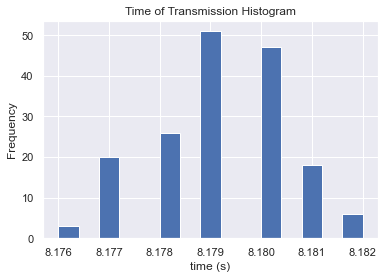

In [39]:
print(f"The total avg is {statistics.mean(total_data)}")
delta_t_np_tot = np.array(total_data)
NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_tot, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("all_data_no_outliers_histogram.png")
plt.show()

In [ ]:
#################################################
############ CREATING TOF HISTOGRAMS ############
#################################################

In [81]:
t_mean_6 = statistics.mean([8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.178, 8.18])
t_mean_ = statistics.mean([8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.178, 8.18])
t_mean_100 = statistics.mean(new_data2)
print(f"The t_mean_0 is {t_mean_0}")
print(f"The t_mean_50 is {t_mean_50}")
print(f"The t_mean_100 is {t_mean_100}")


The t_mean_0 is 8.179188449848024
The t_mean_50 is 8.179156862745097
The t_mean_100 is 8.17911111111111


The total avg is 0.008471864885197609


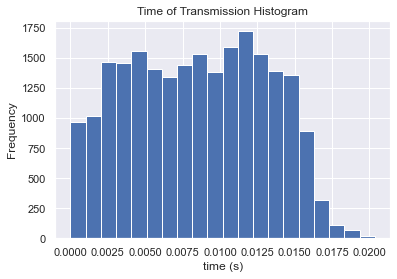

In [79]:
tof_0_100_1d = []
# tof_0_100_2d = []

data_at_0 = [8.179,16.358,24.537,32.717,40.896,49.075,57.254000000000005,65.433,73.61200000000001,81.79100000000001,89.97000000000001,98.15,106.328,114.507,122.686,130.868,139.047,147.226,155.405,163.584,171.764,179.943,188.122,196.30100000000002,204.48000000000002,212.65900000000002,220.83900000000003,229.01800000000003,237.19700000000003,245.37600000000003,253.55500000000004,261.735,269.914,278.09299999999996,286.27199999999993,294.45199999999994,302.6309999999999,310.8089999999999,318.9889999999999,327.1679999999999,335.34699999999987,343.52599999999984,351.70599999999985,359.8849999999998,368.0639999999998,376.24299999999977,384.4229999999998,392.60199999999975,400.7809999999997,408.9599999999997,417.13899999999967,425.3189999999997,433.49799999999965,441.6769999999996,449.8559999999996,458.03499999999957,466.21399999999954,474.39399999999955,482.5729999999995,490.7519999999995,498.9309999999995,507.1109999999995,515.2899999999995,523.4689999999995,531.6489999999994,539.8279999999994,548.0069999999994,556.1859999999994,564.3649999999993,572.5439999999993,580.7229999999993,588.9019999999992,597.0809999999992,605.2599999999992,613.4399999999991,621.6209999999992,629.7999999999992,637.9799999999991,646.1589999999991,654.337999999999,662.516999999999,670.695999999999,678.875999999999,687.0549999999989,695.2339999999989,703.4129999999989,711.5919999999988,719.7719999999988,727.9509999999988,736.1299999999987,744.3089999999987,752.4889999999987,760.6679999999986,768.8469999999986,777.0259999999986,785.2059999999985,793.3839999999985,801.5639999999985,809.7429999999985,817.9219999999984,826.1009999999984,834.2799999999984,842.4589999999984,850.6379999999983,858.8169999999983,866.9959999999983,875.1749999999982,883.3539999999982,891.5329999999982,899.7129999999981,907.8919999999981,916.0709999999981,924.2499999999981,932.428999999998,940.608999999998,948.787999999998,956.9669999999979,965.1459999999979,973.3249999999979,981.5039999999979,989.6829999999978,997.8619999999978,1006.0419999999978,1014.2209999999977,1022.3999999999977,1030.5789999999977,1038.7579999999978,1046.9369999999979,1055.115999999998,1063.294999999998,1071.4739999999981,1079.6529999999982,1087.8319999999983,1096.0109999999984,1104.1899999999985,1112.3719999999985,1120.5509999999986,1128.7299999999987,1136.9089999999987,1145.0879999999988,1153.266999999999,1161.445999999999,1169.624999999999,1177.8039999999992,1185.9829999999993,1194.1619999999994,1202.3409999999994,1210.5199999999995,1218.6999999999996,1226.8789999999997,1235.0579999999998,1243.2369999999999,1251.416,1259.595,1267.775,1275.9540000000002,1284.1320000000003,1292.3120000000004,1300.4910000000004,1308.6700000000005,1316.8490000000006,1325.0280000000007,1333.2070000000008,1341.3860000000009,1349.565000000001,1357.744000000001,1365.9230000000011,1374.1020000000012,1382.2810000000013,1390.4600000000014,1398.6390000000015,1406.8180000000016,1414.9970000000017,1423.1760000000017,1431.3550000000018,1439.534000000002,1447.714000000002,1455.893000000002,1464.0720000000022,1472.2510000000023,1480.4300000000023,1488.6090000000024,1496.7880000000025,1504.9670000000026,1513.1460000000027,1521.3260000000028,1529.5050000000028,1537.684000000003,1545.863000000003,1554.043000000003,1562.2210000000032,1570.4000000000033,1578.5790000000034,1586.7590000000034,1594.9380000000035,1603.1200000000035,1611.2990000000036,1619.4780000000037,1627.6570000000038,1635.8360000000039,1644.015000000004,1652.194000000004,1660.3740000000041,1668.5530000000042,1676.7320000000043,1684.9110000000044,1693.0900000000045,1701.2700000000045,1709.4490000000046,1717.6280000000047,1725.8080000000048,1733.9870000000049,1742.166000000005,1750.345000000005,1758.5240000000051,1766.7030000000052,1774.8820000000053,1783.0610000000054,1791.2410000000054,1799.4200000000055,1807.5990000000056,1815.7780000000057,1823.9570000000058,1832.1360000000059,1840.315000000006,1848.494000000006,1856.6730000000061,1864.8520000000062,1873.0310000000063,1881.2110000000064,1889.3900000000065,1897.5690000000066,1905.7480000000066,1913.9270000000067,1922.1060000000068,1930.285000000007,1938.465000000007,1946.644000000007,1954.8230000000071,1963.0020000000072,1971.1820000000073,1979.3610000000074,1987.5400000000075,1995.7190000000076,2003.8990000000076,2012.0780000000077,2020.2570000000078,2028.4360000000079,2036.615000000008,2044.794000000008,2052.973000000008,2061.153000000008,2069.331000000008,2077.5110000000077,2085.690000000008,2093.8720000000076,2102.0510000000077,2110.2300000000077,2118.409000000008,2126.588000000008,2134.767000000008,2142.946000000008,2151.126000000008,2159.305000000008,2167.484000000008,2175.663000000008,2183.8420000000083,2192.0210000000084,2200.2000000000085,2208.3790000000085,2216.5580000000086,2224.7380000000085,2232.9170000000086,2241.0960000000086,2249.2750000000087,2257.454000000009,2265.633000000009,2273.812000000009,2281.992000000009,2290.171000000009,2298.350000000009,2306.529000000009,2314.708000000009,2322.8870000000093,2331.0660000000094,2339.246000000009,2347.4250000000093,2355.6040000000094,2363.7830000000095,2371.9620000000095,2380.1420000000094,2388.3200000000093,2396.500000000009,2404.679000000009,2412.857000000009,2421.037000000009,2429.216000000009,2437.395000000009,2445.574000000009,2453.7530000000093,2461.933000000009,2470.112000000009,2478.2910000000093,2486.4700000000093,2494.650000000009,2502.8290000000093,2511.0080000000094,2519.1870000000094,2527.3670000000093,2535.5460000000094,2543.7240000000093,2551.904000000009,2560.083000000009,2568.2620000000093,2576.442000000009,2584.623000000009,2592.8020000000092,2600.9810000000093,2609.161000000009,2617.3400000000092,2625.5190000000093,2633.6980000000094,2641.8770000000095,2650.0570000000093,2658.2360000000094,2666.4150000000095,2674.5940000000096,2682.7740000000094,2690.9530000000095]
data_at_100 = [8.18, 16.36, 32.723, 57.263999999999996, 65.445, 73.624, 81.804, 89.983, 98.162, 106.34200000000001, 114.52100000000002, 122.70100000000002, 130.883, 139.059, 147.238, 155.418, 163.596, 171.775, 179.955, 188.13500000000002, 196.31500000000003, 204.49200000000002, 212.669, 245.38400000000001, 261.742, 269.91900000000004, 278.098, 286.277, 302.633, 335.346, 351.707, 384.427, 392.60900000000004, 425.331, 433.509, 441.689, 449.867, 458.045, 466.223, 474.399, 482.577, 490.754, 498.932, 507.11, 515.289, 531.648, 539.8290000000001, 548.0060000000001, 556.1850000000001, 564.365, 597.0840000000001, 605.2650000000001, 613.445, 637.984, 646.164, 662.52, 687.049, 719.769, 727.948, 736.1279999999999, 752.4889999999999, 760.6679999999999, 768.8469999999999, 785.2069999999999, 793.3869999999998, 801.5659999999998, 809.7449999999998, 817.9259999999998, 834.2849999999999, 850.6449999999999, 867.0049999999999, 875.1839999999999, 883.3639999999998, 891.5439999999998]

for i in range(len(data_at_0)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_0[i]) % t_mean_0
        if tof < 1:
            tof_0_100_1d.append((data_at_100[j] - data_at_0[i]) % t_mean_0) 
        # tof_0_100_2d[i][j] = new_data2[j] - data_at_0[i]

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

The total avg is 0.5973588157976426


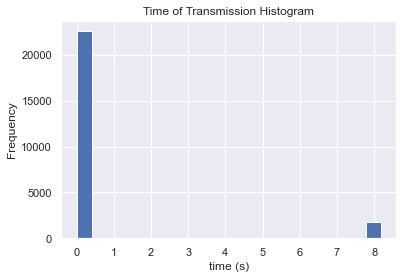

In [69]:
tof_0_100_1d = []

for i in range(len(data_at_0)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_0[i]) % t_mean_0
        tof_0_100_1d.append(tof) 
        # tof_0_100_2d[i][j] = new_data2[j] - data_at_0[i]

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

The total avg is 0.007755770965502515


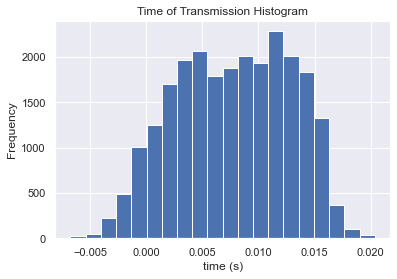

In [80]:
tof_0_100_1d = []

for i in range(len(data_at_0)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_0[i]) % t_mean_0
        if tof > 1:
            tof_0_100_1d.append(tof - t_mean_0)
        else:
            tof_0_100_1d.append(tof) 

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

The total avg is 0.010085709562893001


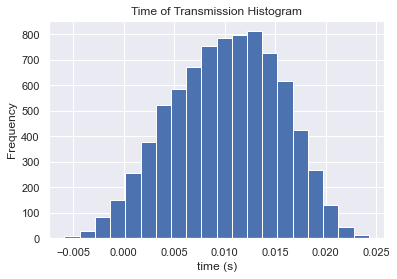

In [85]:
tof_0_100_1d = []
data_at_50 = [8.179, 16.358, 24.535, 32.714, 40.894999999999996, 49.074999999999996, 57.251999999999995, 65.431, 73.61, 81.789, 89.96600000000001, 98.144, 106.32300000000001, 114.50500000000001, 122.686, 130.86700000000002, 147.22700000000003, 155.40600000000003, 171.76100000000002, 179.94000000000003, 188.11800000000002, 196.29700000000003, 204.47400000000002, 212.65300000000002, 220.83300000000003, 229.01300000000003, 237.19300000000004, 245.37300000000005, 253.55300000000005, 261.73400000000004, 269.91400000000004, 278.09400000000005, 286.273, 302.632, 310.81, 318.988, 327.166, 335.344, 343.521, 351.699, 359.879, 368.06, 376.24, 384.419, 392.599, 400.779, 408.95799999999997, 417.13699999999994, 425.31699999999995, 433.4959999999999, 441.6769999999999, 449.8559999999999, 458.0359999999999, 466.21499999999986, 474.39399999999983, 482.57399999999984, 490.75199999999984, 507.10799999999983, 515.2849999999999, 523.4619999999999, 531.6439999999999, 539.8239999999998, 548.0039999999998, 556.1849999999998, 564.3659999999999, 580.7249999999999, 588.9049999999999, 597.0839999999998, 605.2629999999998, 613.4399999999998, 621.6159999999999, 629.7929999999999, 637.9699999999999, 646.1479999999999, 654.3259999999999, 662.5059999999999, 670.6869999999999, 678.8669999999998, 687.0469999999998, 695.2269999999997, 703.4049999999997, 719.7609999999997, 727.9409999999997, 736.1209999999996, 744.3029999999997, 752.4829999999996, 760.6619999999996, 768.8399999999996, 777.0169999999996, 785.1959999999996, 793.3749999999995, 809.7379999999996, 817.9169999999996, 826.0959999999995, 834.2739999999995, 842.4509999999996, 850.6279999999996, 858.8049999999996, 866.9829999999996, 875.1619999999996, 883.3419999999995, 891.5229999999996, 899.7019999999995, 907.8829999999996, 916.0639999999996, 924.2439999999996, 932.4219999999996, 940.6029999999996, 948.7819999999996]

for i in range(len(data_at_50)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_50[i]) % t_mean_50
            
        if tof > 1:
            tof_0_100_1d.append(tof - t_mean_50)
        else:
            tof_0_100_1d.append(tof) 

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_50_100_histogram.png")
plt.show()
        

In [72]:
SOS = 1500 #m/s
print(f"The distance is approximately {statistics.mean(tof_0_100_1d) * 1500}.")

The distance is approximately 11.633656448253772.


In [87]:
(1161.465 % 8.179) * 1500

70.4999999998197

In [ ]:
############ Testing Directory Stuff ############

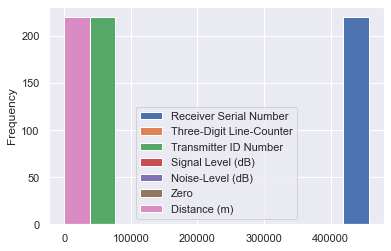

In [31]:
AllFiles = list(os.walk("./Long_Beach_6_29_2021"))  #Walks everything inside current directory

df_list = []

for item in AllFiles:
    #print("item is", item, "\n")    
    foldername, LoDirs, LoFiles = item 

    for filename in LoFiles:
        if filename[-3:] == "csv" and (len(filename) == 10 or len(filename) == 11):    
            path = os.getcwd() + foldername[1:] + "/" + filename 
            df = pd.read_csv(path, engine='python', header=0, index_col=False)
            df_list.append(df)

final_df = pd.concat(df_list)
ax = final_df.plot.hist(bins=12)

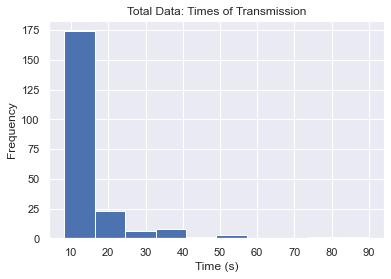

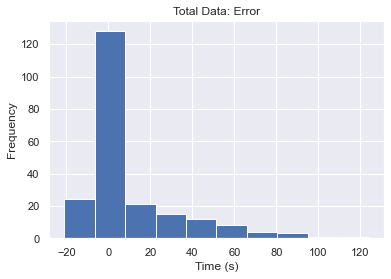

In [73]:
AllFiles = list(os.walk("./Long_Beach_6_29_2021"))  #Walks everything inside current directory

delta_t_values = np.array([])
error_values = np.array([])

for item in AllFiles:
    #print("item is", item, "\n")    
    foldername, LoDirs, LoFiles = item 

    for filename in LoFiles:
        if filename[-3:] == "csv" and "calculated_error" in filename:  
            path = os.getcwd() + foldername[1:] + "/" + filename 
            df = pd.read_csv(path, engine='python', header=None, index_col=False)
            delta_t_values = np.concatenate((delta_t_values, df.values[0][1:]))
            error_values = np.concatenate((error_values, df.values[3][1:]))

NUM_OF_BINS = 10 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_values, NUM_OF_BINS)
plt.title("Total Data: Times of Transmission")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_total_histogram.png")
plt.show()

plt.hist(error_values, NUM_OF_BINS)
plt.title("Total Data: Error")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.savefig("error_total_histogram.png")
plt.show()

In [75]:
foldername = input("What do you want to name the folder?: ")
os.mkdir(os.path.join(".", foldername))
path = os.path.join(".", foldername)

os.mkdir(os.path.join(path, "calculated_error_data"))
os.mkdir(os.path.join(path, "delta_t_histograms"))
os.mkdir(os.path.join(path, "noise_plots"))
os.mkdir(os.path.join(path, "raw_data"))
os.mkdir(os.path.join(path, "signal_plots"))
os.mkdir(os.path.join(path, "summaries"))
os.mkdir(os.path.join(path, "time_of_flight_histograms"))



What do you want to name the folder?: test


In [77]:
print(path)

./test


In [82]:
AllFiles = list(os.walk("."))  #Walks everything inside current directory

foldername, LoDirs, LoFiles = AllFiles[0]


for filename in LoFiles:
    if filename[-3:] == "csv" and "calculated_error" in filename:
        shutil.move(filename, os.path.join(path, "calculated_error_data"))
        
    elif filename[-3:] == "png" and "histogram" in filename:
        if "data" in filename:
            shutil.move(filename, os.path.join(path, "delta_t_histograms"))
        else:
            shutil.move(filename, os.path.join(path, "time_of_flight_histograms"))
            
    elif filename[-3:] == "csv" and "summaries" in filename:
        shutil.move(filename, os.path.join(path, "summaries"))
        
    elif filename[-3:] == "png" and "noise" in filename:
        shutil.move(filename, os.path.join(path, "noise_plots"))
        
    elif filename[-3:] == "png" and "signal" in filename:
        shutil.move(filename, os.path.join(path, "signal_plots"))
    
    elif filename[-3:] == "csv" and (len(filename) == 10 or len(filename) == 11):
        shutil.move(filename, os.path.join(path, "raw_data"))
